In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
from networkx.algorithms import bipartite
#%matplotlib inline

In [2]:
df = pd.read_csv('./archive/data.csv')
df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


In [3]:
#slight look at data
df["Track Name"]

0          Reggaetón Lento (Bailemos)
1                            Chantaje
2           Otra Vez (feat. J Balvin)
3                        Vente Pa' Ca
4                              Safari
                      ...            
3441192            More Than You Know
3441193                        Issues
3441194                   Tuo Fei Lun
3441195                            面具
3441196                    Let Her Go
Name: Track Name, Length: 3441197, dtype: object

In [4]:

df["Region"]
regions = []
for i in list(df["Region"]):
    if i not in regions:
        regions.append(i)

In [5]:
G = nx.Graph()

In [6]:
from datetime import date, datetime
import csv

Songs = {}
#Songs.update({"song": 0}) 

SongDate = {}

#TODO: reference... got this from somewhere else
def consecutiveDate(date, prevDate):
    if prevDate == None:
        return False
    
    dates = [datetime.strptime(date, "%Y-%m-%d"), datetime.strptime(prevDate, "%Y-%m-%d")]

    date_ints = set(d.toordinal() for d in dates)

    if max(date_ints) - min(date_ints) == len(date_ints) - 1: 
        return True
    
    return False


i = 0 
current_region = df["Region"][0]
for row in df.index:
    #print(df["Track Name"][row], df["Region"][row]

    if Songs.get(df["Track Name"][row]) != None and df["Region"][row] == current_region and consecutiveDate(df["Date"][row], SongDate.get(df["Track Name"][row])):
        #add to value
        newValue = Songs.get(df["Track Name"][row]) + 1
        Songs.update({df["Track Name"][row]: newValue})
    else:
        Songs.update({df["Track Name"][row]: 1})

    SongDate.update({df["Track Name"][row]: df["Date"][row]})

    if current_region != df["Region"][row]:
        G.add_node(current_region, bipartite = 0)
        songKeys = Songs.keys()

        for song in songKeys:
            if Songs.get(song) >= 30:
                G.add_node(song, bipartite = 1)
                #print(song, current_region)
                G.add_edge(song, current_region)

        current_region = df["Region"][row]
        Songs.clear()
        SongDate.clear()

    i = i + 1

In [7]:
#number of node 
print(len(G))
#number of edges
print(G.size())

#connected components 
print(nx.number_connected_components(G))

#clustering
print(bipartite.average_clustering(G))

#path length
print(nx.average_shortest_path_length(G, weight = None))

2292
6933
1
0.3804765398139182
3.715939448924885


In [8]:
#all the degrees 
degrees = [G.degree(node) for node in G]

print(degrees)

kmin = min(degrees)
kmax = max(degrees)

[170, 17, 15, 15, 8, 4, 6, 6, 9, 13, 10, 7, 5, 9, 15, 1, 6, 1, 9, 14, 3, 6, 1, 5, 1, 22, 17, 7, 10, 9, 5, 1, 1, 5, 17, 1, 4, 2, 8, 6, 47, 12, 21, 15, 14, 2, 16, 17, 3, 2, 3, 23, 3, 5, 9, 28, 4, 6, 26, 7, 49, 15, 1, 4, 16, 18, 13, 1, 8, 10, 16, 9, 21, 17, 22, 14, 26, 17, 2, 9, 12, 11, 10, 17, 17, 17, 13, 6, 5, 5, 13, 1, 6, 11, 11, 15, 13, 13, 27, 14, 9, 8, 18, 48, 17, 18, 16, 17, 10, 2, 17, 12, 15, 17, 12, 16, 18, 49, 16, 10, 20, 16, 2, 47, 17, 49, 40, 16, 42, 7, 11, 16, 49, 1, 16, 4, 4, 9, 9, 17, 14, 14, 17, 48, 13, 8, 48, 2, 21, 18, 11, 3, 2, 2, 11, 6, 17, 14, 39, 20, 3, 16, 7, 4, 14, 44, 13, 16, 14, 12, 2, 193, 3, 1, 2, 1, 1, 15, 1, 1, 1, 7, 1, 1, 8, 1, 1, 1, 1, 1, 2, 1, 1, 1, 17, 11, 1, 2, 1, 3, 4, 1, 3, 13, 2, 13, 1, 8, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 9, 5, 21, 1, 1, 1, 1, 1, 7, 34, 1, 1, 14, 9, 1, 16, 1, 1, 1, 1, 1, 1, 8, 12, 1, 1, 1, 1, 23, 1, 1, 1, 1, 19, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 17, 8, 14, 1, 2, 12, 11, 19, 13, 35, 18, 12, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 6

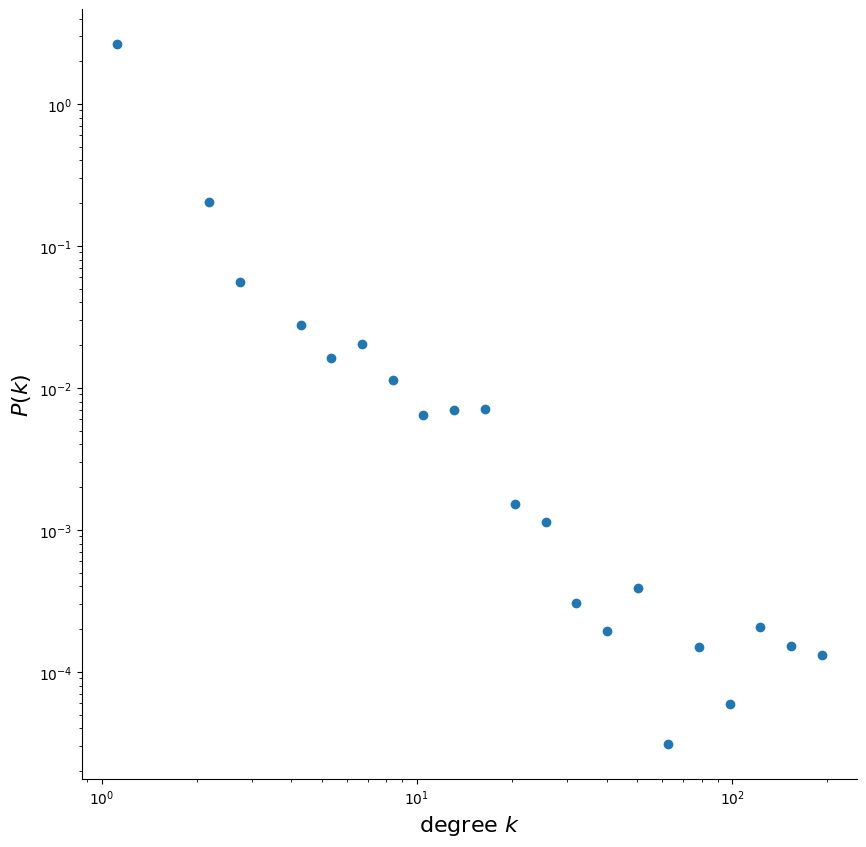

In [9]:
#loglog
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num = 25)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(10,10))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

[  1.          24.77777778  48.55555556  72.33333333  96.11111111
 119.88888889 143.66666667 167.44444444 191.22222222 215.        ]
[0.04069824 0.00038533 0.00011009 0.00012844 0.00012844 0.00018349
 0.00014679 0.00012844 0.00014679]


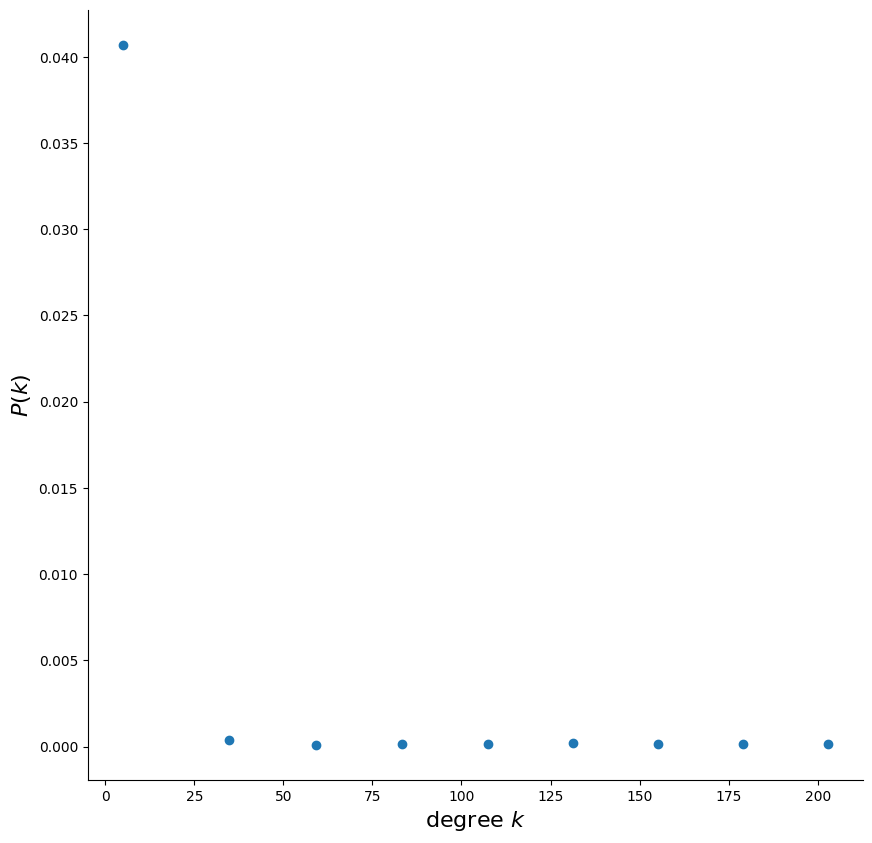

In [10]:
#linear
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=10)

print(bin_edges)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

print(density)

fig = plt.figure(figsize=(10,10))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [11]:
#write edges
with open("edges.csv", "w", encoding ="UTF8", newline='') as o:
                writer = csv.writer(o)
                writer.writerow(["source", "target"])

for edge in list(G.edges()):
    row = [edge[0], edge[1]]
    with open("edges.csv", "a", encoding ="UTF8", newline='') as o:
                writer = csv.writer(o)
                writer.writerow(row)



In [12]:
#write nodes
with open("songscountries.csv", "w", encoding ="UTF8", newline='') as o:
                writer = csv.writer(o)
                writer.writerow(["label", "side"])


for node in list(G.nodes()):
    with open("songscountries.csv", "a", encoding ="UTF8", newline='') as o:
                writer = csv.writer(o)
                if node in regions:
                    writer.writerow([node, 1])
                else:
                    writer.writerow([node, 0])
                


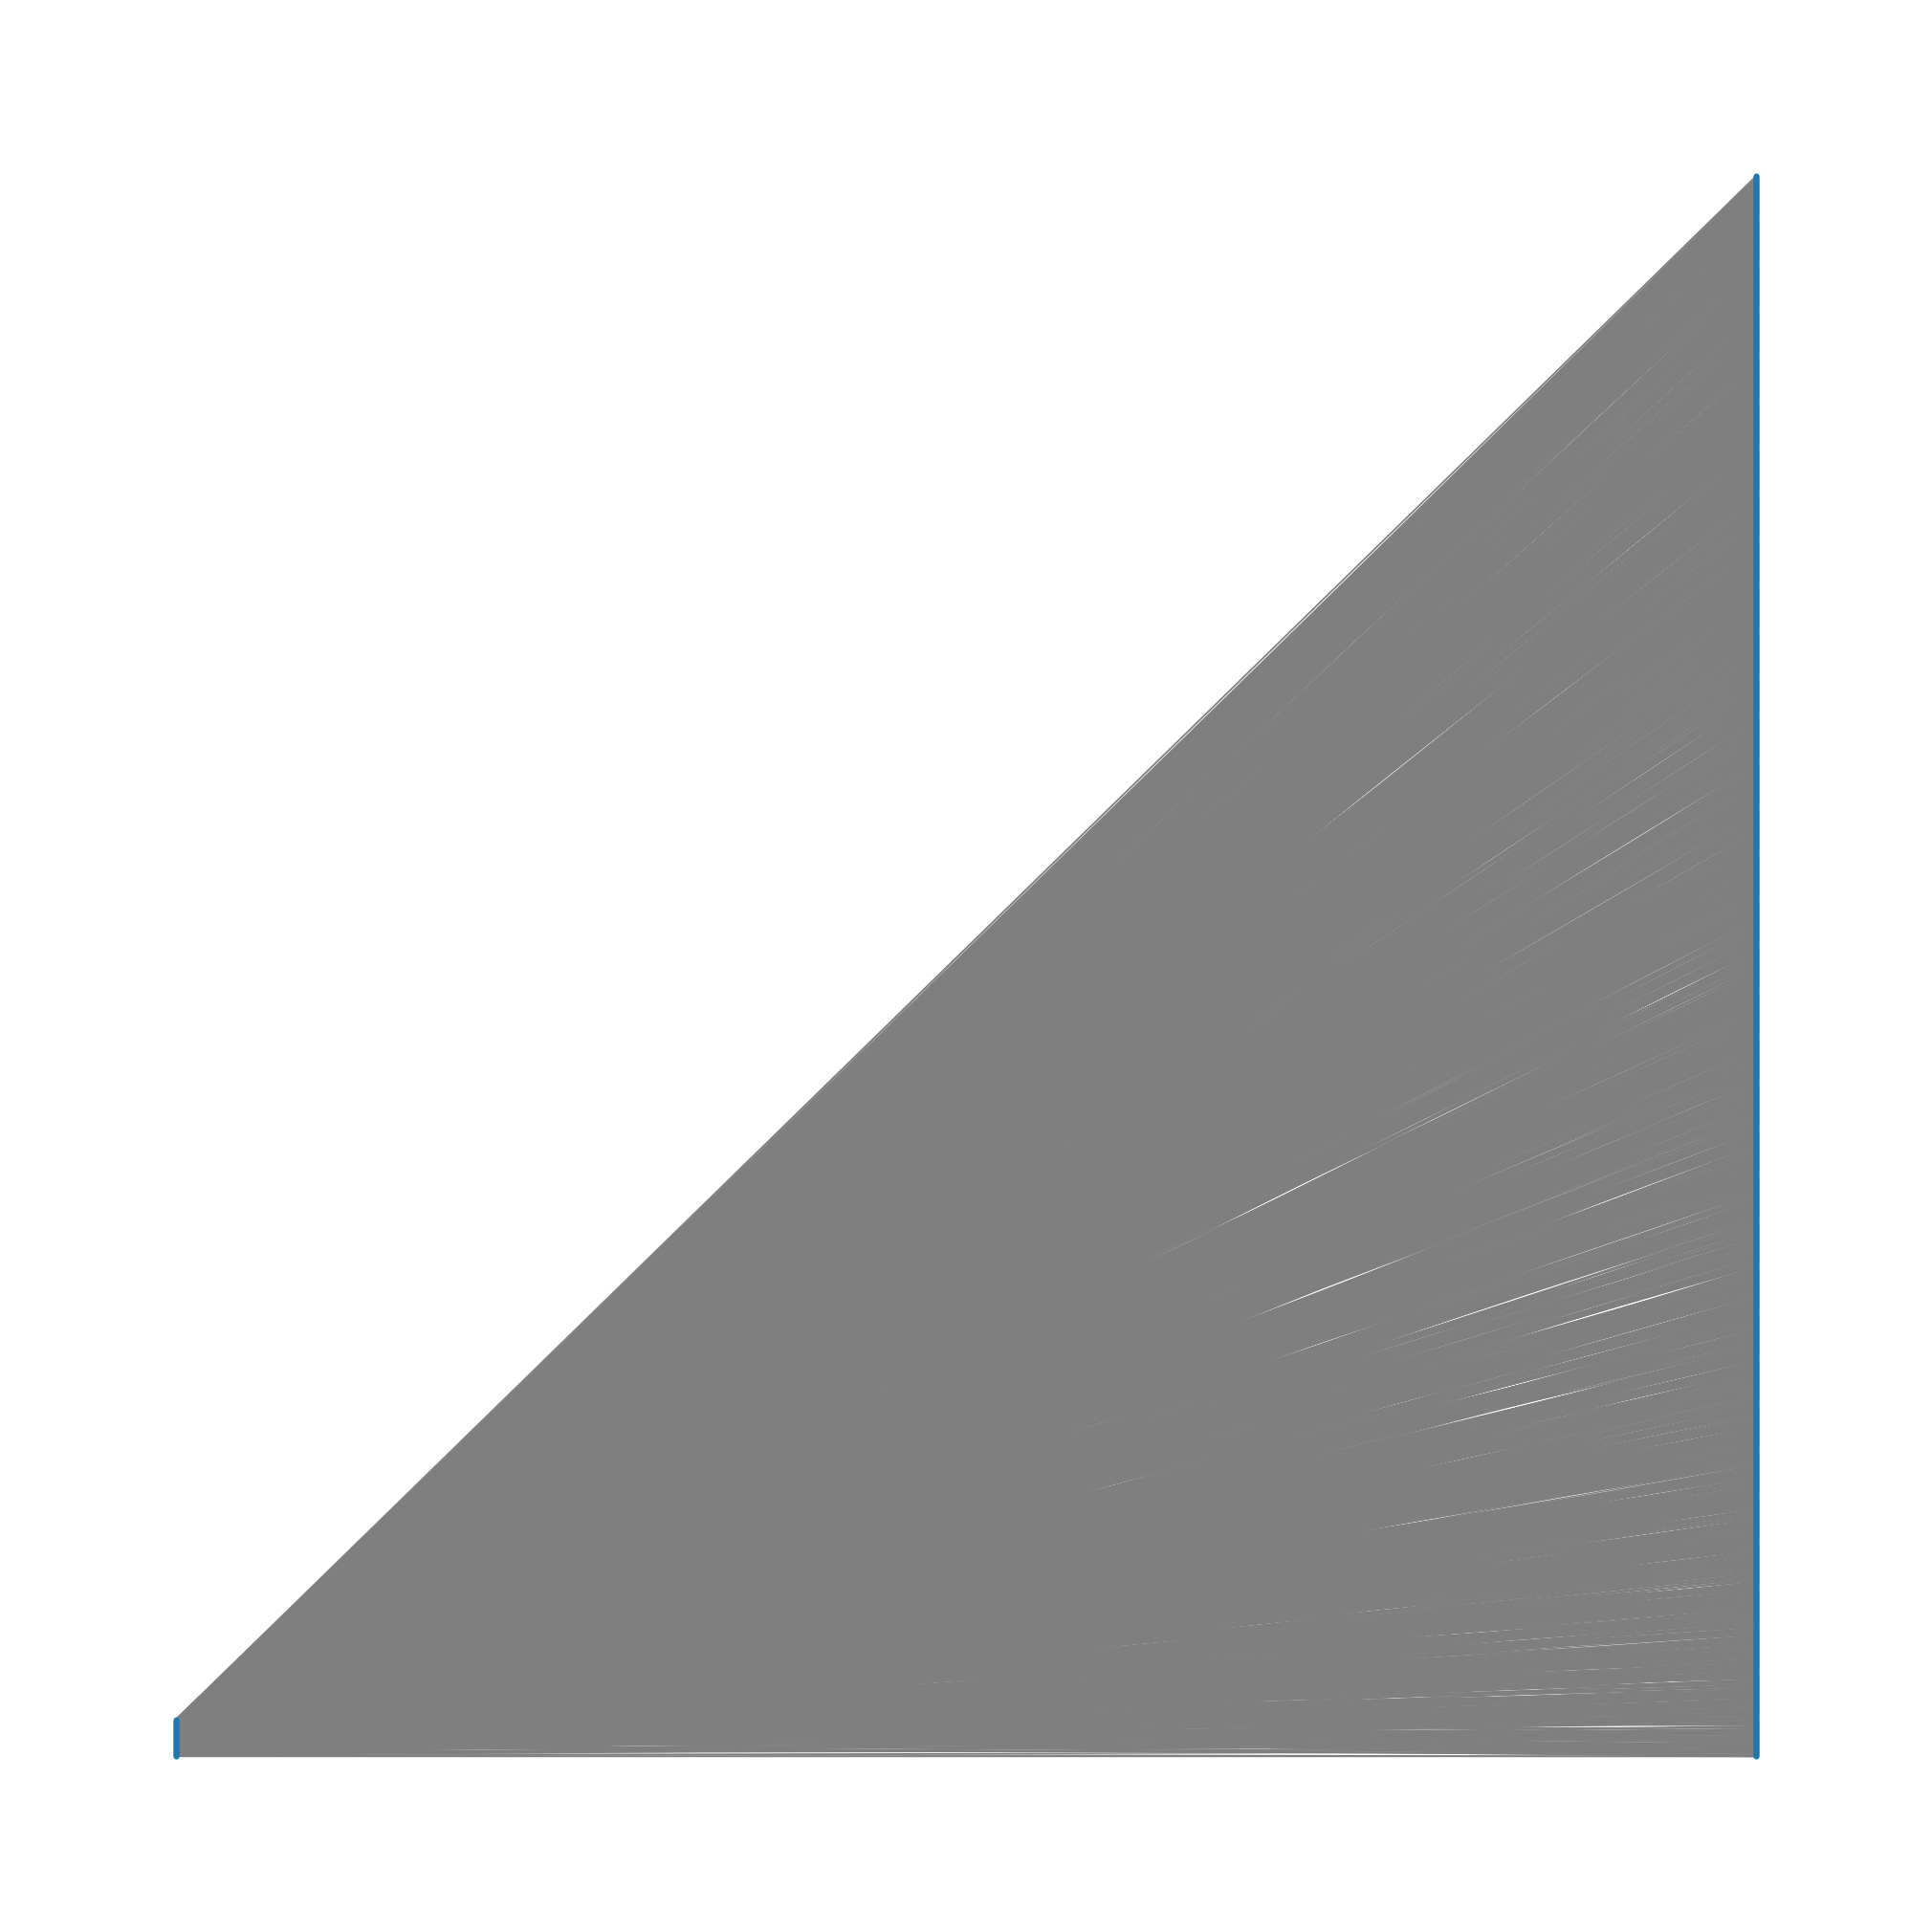

In [13]:
X, Y = bipartite.sets(G)

#TODO got this from somewhere else
pos = dict()
pos.update( (n , (1, i)) for i, n in enumerate(X) )
pos.update( (n , (2, i)) for i, n in enumerate(Y) )

fig = plt.figure(figsize=(20,20))
nx.draw(G, pos= pos, node_size=10, edge_color = "tab:gray")

In [14]:
#print(list(X)) X is the regions

#clustering of both sets
print(bipartite.average_clustering(G, X))
print(bipartite.average_clustering(G, Y))

0.13507874707465273
0.3862854201244106


In [31]:
x_size = len(X)
print(x_size)
y_size = len(Y)
edges = G.size()

53


In [16]:
#null model
clustering_DP = []
clusteringX_DP = []
clusteringY_DP = []

for i in range(1):
    random = bipartite.gnmk_random_graph(x_size, y_size, edges) 
    C_DP = bipartite.average_clustering(random)
    clustering_DP.append(C_DP)
    S = [random.subgraph(c).copy() for c in nx.connected_components(random)]
    max_S = max(S, key = len)
    X_r, Y_r = bipartite.sets(max_S)
    X_DP = bipartite.average_clustering(max_S, X_r)
    Y_DP = bipartite.average_clustering(max_S, Y_r)
    clusteringX_DP.append(X_DP)
    clusteringY_DP.append(Y_DP)

print(np.mean(clustering_DP))
print(np.std(clustering_DP))
print(np.mean(clusteringX_DP))
print(np.std(clusteringX_DP))
print(np.mean(clusteringY_DP))
int(np.std(clusteringY_DP))

0.19217851299485944
0.0
0.029719518436374735
0.0
0.2041386127009721


0

In [33]:
T = G.copy()
# https://stackoverflow.com/questions/48382575/sort-graph-nodes-according-to-their-degree
for i in sorted(T.degree, key = lambda x: x[1], reverse=True):
    if i[1] >= 42:
        print(i)

('tr', 215)
('us', 210)
('ph', 204)
('id', 202)
('sg', 198)
('br', 197)
('fr', 193)
('ca', 192)
('es', 188)
('my', 184)
('jp', 182)
('pe', 174)
('global', 172)
('ec', 170)
('uy', 170)
('tw', 163)
('ar', 162)
('cr', 157)
('mx', 157)
('cl', 155)
('py', 153)
('fi', 152)
('it', 146)
('de', 140)
('gt', 140)
('au', 133)
('ie', 132)
('nl', 131)
('be', 129)
('no', 128)
('pa', 124)
('do', 124)
('nz', 122)
('pt', 116)
('gb', 115)
('ch', 114)
('dk', 114)
('co', 114)
('at', 109)
('pl', 99)
('cz', 91)
('bo', 87)
('se', 87)
('sv', 82)
('gr', 82)
('hn', 79)
('hu', 75)
('is', 60)
('sk', 55)
('Perfect', 49)
('Havana', 49)
('Too Good At Goodbyes - Edit', 49)
('rockstar', 49)
('New Rules', 48)
('Wolves', 48)
('Gucci Gang', 48)
('Shape of You', 47)
('What Lovers Do (feat. SZA)', 47)
('Perfect Duet (Ed Sheeran & Beyoncé)', 44)
('Too Good At Goodbyes', 42)


In [35]:
from networkx.algorithms.community import greedy_modularity_communities

c = greedy_modularity_communities(G)

In [44]:
for c_i in c: 
    c_reg = []

    for i in c_i:
        if len(i) == 2:
            c_reg.append(i)
    print(c_reg)


['Du', 'id', '13', 'tw', '不該', 'lv', '人質', '晴天', 'sk', '鍊愛', 'my', 'ph', '演員', 'lt', 'hu', 'nz', 'cz', 'sg', 'Up', 'pt', 'ie', 'us', 'pl', '她說', 'gr', 'ch', '戒菸', '風衣', 'ca', 'be', 'lu', '十年', 'au']
['sv', 'mx', '23', 'co', 'cl', 'gt', 'ee', 'pe', 'bo', 'do', 'hn', 'cr', 'ar', 'uy', 'py', 'es', 'pa', 'ec']
['gb', '17', 'se', 'at', 'dk', 'de', '38', 'no']
['Rg', 'br']
['tr']
['fr']
['jp', '愛唄', 'TT']
['fi']
['OK', 'it']
['nl']
['is']


In [54]:
from langdetect import detect

all_lang = {}

for c_i in c: 
    c_reg = {}

    for i in c_i:
        #error catching https://stackoverflow.com/questions/40783383/error-using-langdetect-in-python-no-features-in-text
        try:
            detected = detect(i)
            if c_reg.get(detected) != None:
                newValue = c_reg.get(detected) + 1
                c_reg.update({detected: newValue})
            else:
                c_reg.update({detected: 1})

            if all_lang.get(detected) != None:
                newValue = all_lang.get(detected) + 1
                all_lang.update({detected: newValue})
            else:
                all_lang.update({detected: 1})

        except:
            print("Oh no", i)
    #sort https://www.geeksforgeeks.org/python-sort-a-dictionary/
    c_res = {key: val for key, val in sorted(c_reg.items(), key = lambda ele: ele[1], reverse = True)}
    print(c_res)

all_lang_res = {key: val for key, val in sorted(all_lang.items(), key = lambda ele: ele[1], reverse = True)}
print(all_lang_res)

Oh no 13
Oh no 1-800-273-8255
Oh no 4422
{'en': 288, 'id': 61, 'de': 42, 'ko': 35, 'tl': 25, 'fr': 20, 'sw': 19, 'pt': 18, 'it': 18, 'zh-cn': 16, 'nl': 14, 'af': 14, 'cy': 13, 'ca': 13, 'pl': 12, 'so': 12, 'no': 11, 'ro': 10, 'es': 9, 'hr': 7, 'vi': 7, 'sv': 7, 'da': 7, 'sk': 6, 'zh-tw': 6, 'fi': 5, 'et': 4, 'tr': 4, 'cs': 3, 'sl': 3, 'lv': 2, 'sq': 2, 'lt': 1, 'hu': 1, 'el': 1}
Oh no 23
{'es': 122, 'en': 63, 'pt': 53, 'ca': 36, 'it': 28, 'fr': 21, 'de': 19, 'tl': 11, 'so': 11, 'id': 9, 'hu': 9, 'hr': 8, 'ro': 7, 'sw': 6, 'pl': 6, 'fi': 5, 'af': 4, 'sv': 4, 'et': 4, 'nl': 4, 'no': 4, 'sk': 3, 'tr': 3, 'sq': 2, 'da': 2, 'sl': 2, 'lt': 2, 'lv': 1, 'cy': 1}
Oh no 17
Oh no 24/7
Oh no 38
{'en': 95, 'de': 42, 'da': 23, 'sv': 15, 'no': 15, 'tl': 13, 'it': 11, 'id': 9, 'nl': 8, 'fr': 8, 'et': 7, 'so': 7, 'pt': 6, 'ro': 6, 'tr': 5, 'fi': 5, 'es': 5, 'ca': 3, 'sw': 3, 'cy': 2, 'lt': 2, 'pl': 2, 'hr': 2, 'hu': 1, 'af': 1, 'sl': 1, 'sk': 1}
{'pt': 89, 'en': 9, 'es': 8, 'id': 7, 'ca': 7, 'it': 6, '

In [18]:
#random_test = bipartite.gnmk_random_graph(x_size, y_size, edges) 

#S = [random_test.subgraph(c).copy() for c in nx.connected_components(random_test)]

#max_S = max(S, key = len)
#max_S.nodes(data = True)

In [19]:
#short_path_DP = []

#for i in range(100):
    #random = bipartite.gnmk_random_graph(x_size, y_size, edges) 
    #S = [random.subgraph(c).copy() for c in nx.connected_components(random)]
    #max_S = max(S, key = len)
    #D_DP = nx.average_shortest_path_length(max_S, weight = None)
    #short_path_DP.append(D_DP)

#print(np.mean(short_path_DP))
#print(np.std(short_path_DP))
    